<a href="https://colab.research.google.com/github/patelmegh1784/ShadowFox/blob/main/Beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()


Saving IPL sample data.xlsx to IPL sample data.xlsx


In [5]:
!pip install pandas openpyxl matplotlib seaborn


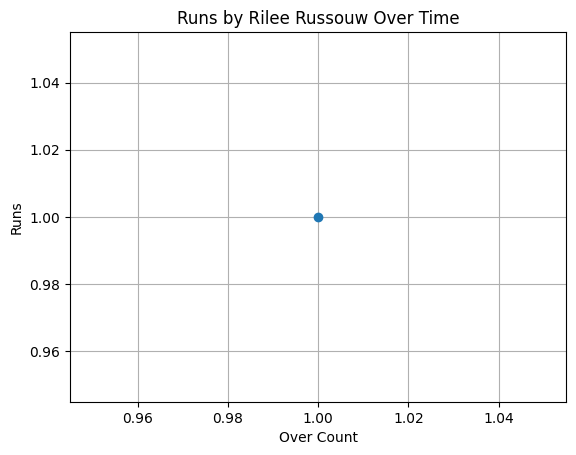

In [6]:
# A. Matplotlib
#1. Line Plot – Over vs Runs (Top 1 Player's Performance)
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("IPL sample data.xlsx", sheet_name="Sheet1", header=3)
df.dropna(how='all', inplace=True)
df['Runs'] = pd.to_numeric(df['Unnamed: 9'], errors='coerce')

# Filter for one player
player_data = df[df['Unnamed: 4'] == 'Rilee russouw']
plt.plot(player_data['Unnamed: 10'], player_data['Runs'], marker='o')
plt.title("Runs by Rilee Russouw Over Time")
plt.xlabel("Over Count")
plt.ylabel("Runs")
plt.grid(True)
plt.show()


Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Runs'],
      dtype='object')
Unnamed: 10    35
Runs           46
dtype: int64


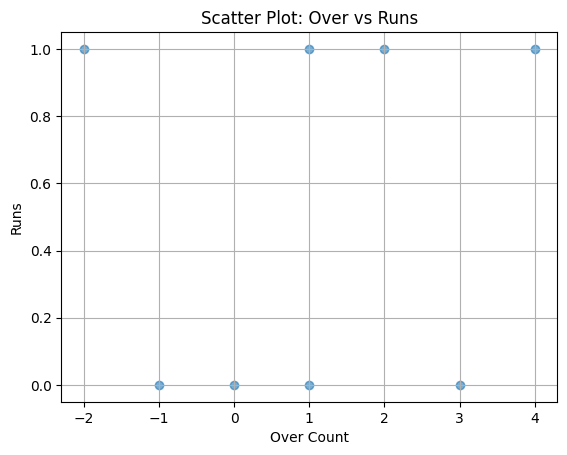

In [10]:
#2. Scatter Plot – Runs vs Overcount
import matplotlib.pyplot as plt
print(df.columns)
# Convert columns to numeric, if possible (this will convert errors to NaN)
df['Unnamed: 10'] = pd.to_numeric(df['Unnamed: 10'], errors='coerce')
df['Runs'] = pd.to_numeric(df['Runs'], errors='coerce')

# Check for any NaN values
print(df[['Unnamed: 10', 'Runs']].isna().sum())


plt.scatter(df['Unnamed: 10'], df['Runs'], alpha=0.6)
plt.title("Scatter Plot: Over vs Runs")
plt.xlabel("Over Count")
plt.ylabel("Runs")
plt.grid(True)
plt.show()


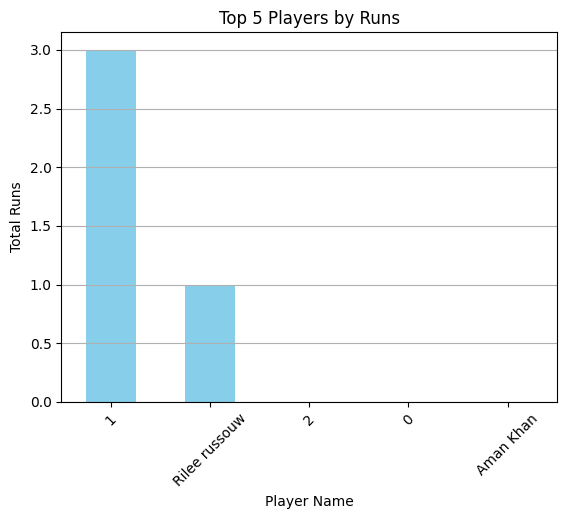

In [11]:
#3. Bar Chart – Total Runs by Top 5 Players
top_players = df.groupby('Unnamed: 4')['Runs'].sum().sort_values(ascending=False).head(5)
top_players.plot(kind='bar', color='skyblue')
plt.title("Top 5 Players by Runs")
plt.xlabel("Player Name")
plt.ylabel("Total Runs")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


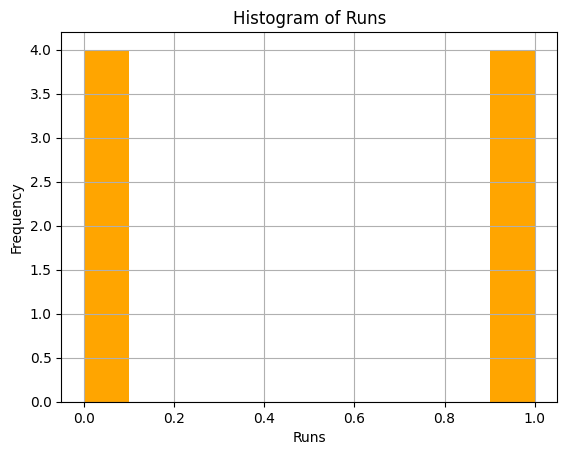

In [12]:
#4. Histogram – Distribution of Runs
df['Runs'].hist(bins=10, color='orange')
plt.title("Histogram of Runs")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


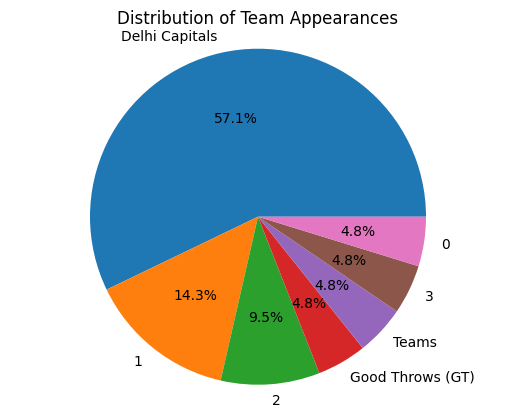

In [13]:
#5. Pie Chart – Team Participation
team_counts = df['Unnamed: 3'].value_counts()
plt.pie(team_counts, labels=team_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Team Appearances")
plt.axis('equal')
plt.show()


In [15]:
# B. Seaborn
import seaborn as sns

# Clean again
df['Runs'] = pd.to_numeric(df['Unnamed: 9'], errors='coerce')
df = df.dropna(subset=['Runs'])



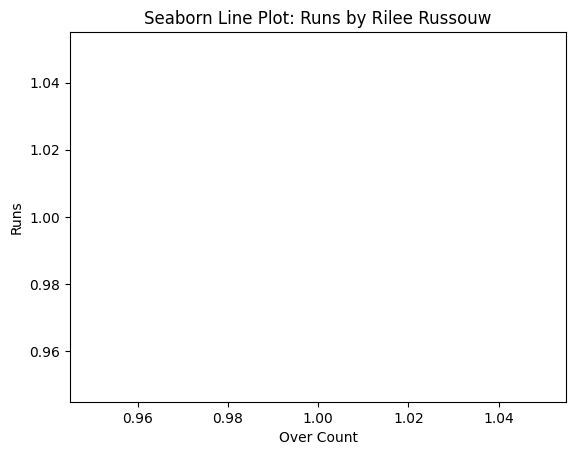

In [16]:
#1. Line Plot – Over vs Runs (Same player)
sns.lineplot(data=player_data, x='Unnamed: 10', y='Runs')
plt.title("Seaborn Line Plot: Runs by Rilee Russouw")
plt.xlabel("Over Count")
plt.ylabel("Runs")
plt.show()


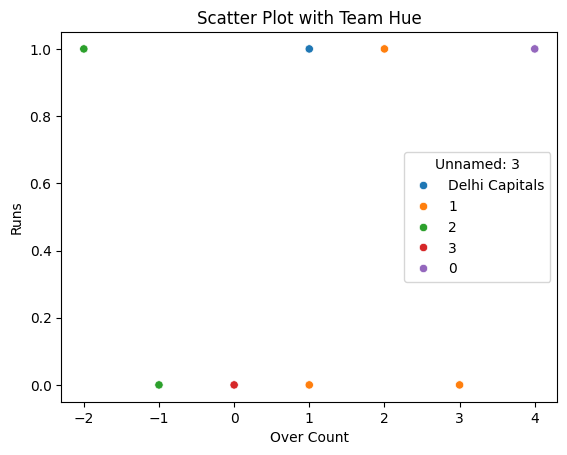

In [17]:
#2. Scatter Plot – Runs vs Overcount
sns.scatterplot(data=df, x='Unnamed: 10', y='Runs', hue='Unnamed: 3')
plt.title("Scatter Plot with Team Hue")
plt.xlabel("Over Count")
plt.ylabel("Runs")
plt.show()


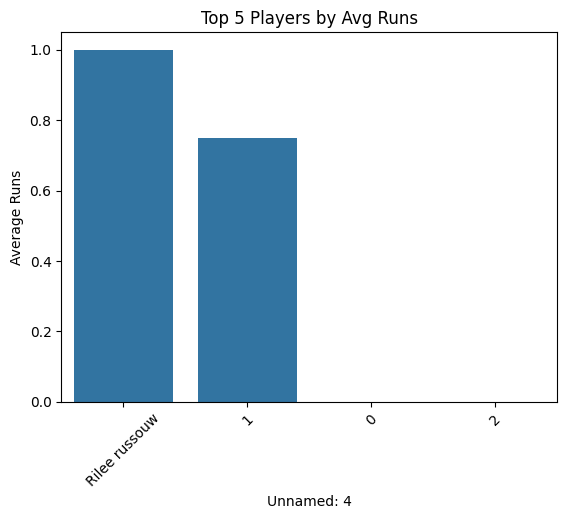

In [18]:
#3. Bar Chart – Average Runs per Player (Top 5)
avg_runs = df.groupby('Unnamed: 4')['Runs'].mean().sort_values(ascending=False).head(5)
sns.barplot(x=avg_runs.index, y=avg_runs.values)
plt.title("Top 5 Players by Avg Runs")
plt.ylabel("Average Runs")
plt.xticks(rotation=45)
plt.show()


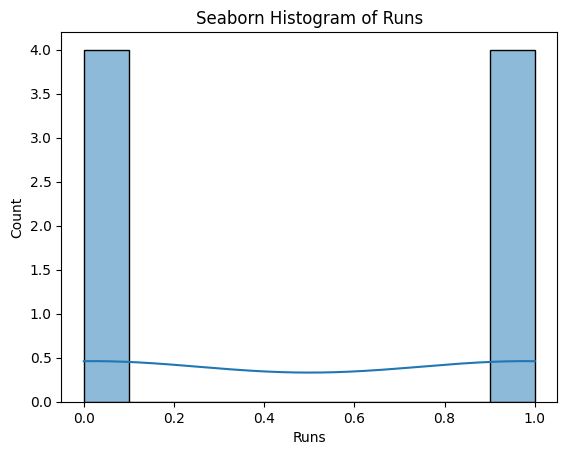

In [19]:
#4. Histogram – Runs Distribution
sns.histplot(df['Runs'], bins=10, kde=True)
plt.title("Seaborn Histogram of Runs")
plt.xlabel("Runs")
plt.show()
